## **IMPORTING THE REQUIRED LIBRARIES**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,f1_score,recall_score,roc_curve, roc_auc_score, RocCurveDisplay
import pickle


## **Exploratory Data Analysis**

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Dataset Description

**age:** Age in years  
**sex:** Sex  
- 1 = Male  
- 0 = Female  

**cp:** Chest pain type  
- Value 0: Typical angina  
- Value 1: Atypical angina  
- Value 2: Non-anginal pain  
- Value 3: Asymptomatic  

**trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)  

**chol:** Serum cholesterol in mg/dl  

**fbs:** (Fasting blood sugar > 120 mg/dl)  
- 1 = True  
- 0 = False  

**restecg:** Resting electrocardiographic results  
- Value 0: Normal  
- Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
- Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria  

**thalach:** Maximum heart rate achieved  

**exang:** Exercise induced angina  
- 1 = Yes  
- 0 = No  

**oldpeak:** ST depression induced by exercise relative to rest  

**slope:** The slope of the peak exercise ST segment  
- Value 0: Upsloping  
- Value 1: Flat  
- Value 2: Downsloping  

**ca:** Number of major vessels (0–3) colored by fluoroscopy  

**thal:** Thalassemia type  
- 0 = Error (in the original dataset 0 maps to NaN)  
- 1 = Fixed defect  
- 2 = Normal  
- 3 = Reversible defect  

**target (the label):**  
- 0 = No disease  
- 1 = Disease


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### **Dataset Summary**

The dataset contains **303 patient records** with **14 clinical features** used to predict heart disease.  
The **average patient age** is about **54 years**, ranging from **29 to 77**, and around **68% are male**.  
The **average resting blood pressure** is approximately **132 mmHg**, while the **mean cholesterol level** is **246 mg/dl**.  
Patients achieve an average **maximum heart rate of 150 bpm**, and the **oldpeak (ST depression)** typically lies around **1.0**, with a few higher outliers up to **6.2**.  
About **32% of the patients experienced exercise-induced angina**, and roughly **54%** were diagnosed with heart disease (**target = 1**), indicating a fairly balanced dataset suitable for binary classification.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### **Dataset Information**

The dataset contains **303 entries** with **14 attributes**, all of which are **complete (no missing values)**.  
Most of the columns are of **integer type (int64)**, except for *oldpeak*, which is a **floating-point feature (float64)**.  
This indicates that the dataset is clean and ready for analysis without the need for imputation or datatype conversion.  
The overall memory usage is approximately **33.3 KB**, making it lightweight and easy to process.


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### **Droping faulty data**



In [7]:
data = data[data['ca'] < 4] #droping the wrong ca values
data = data[data['thal'] > 0] # droping the wrong thal value

In [8]:
print("After dropping faulty data, size of data is : ",data.shape)

After dropping faulty data, size of data is :  (296, 14)


### **Data Visualization And Analysis**


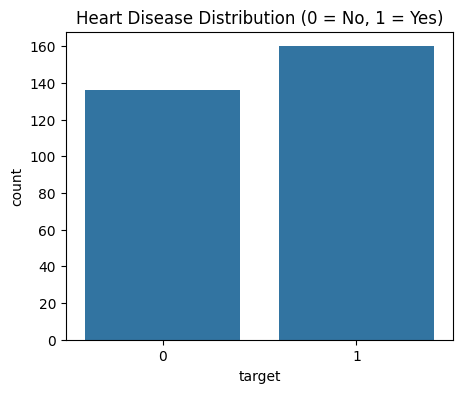

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=data)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()


### **Heart Disease Distribution (0 = No, 1 = Yes)**

This bar chart shows how many people in the dataset have heart disease (1) compared to those who don’t (0).
We can see that the number of patients with heart disease is slightly higher than those without it.
This indicates that the dataset is fairly balanced, which is good for model training because it prevents bias toward one class


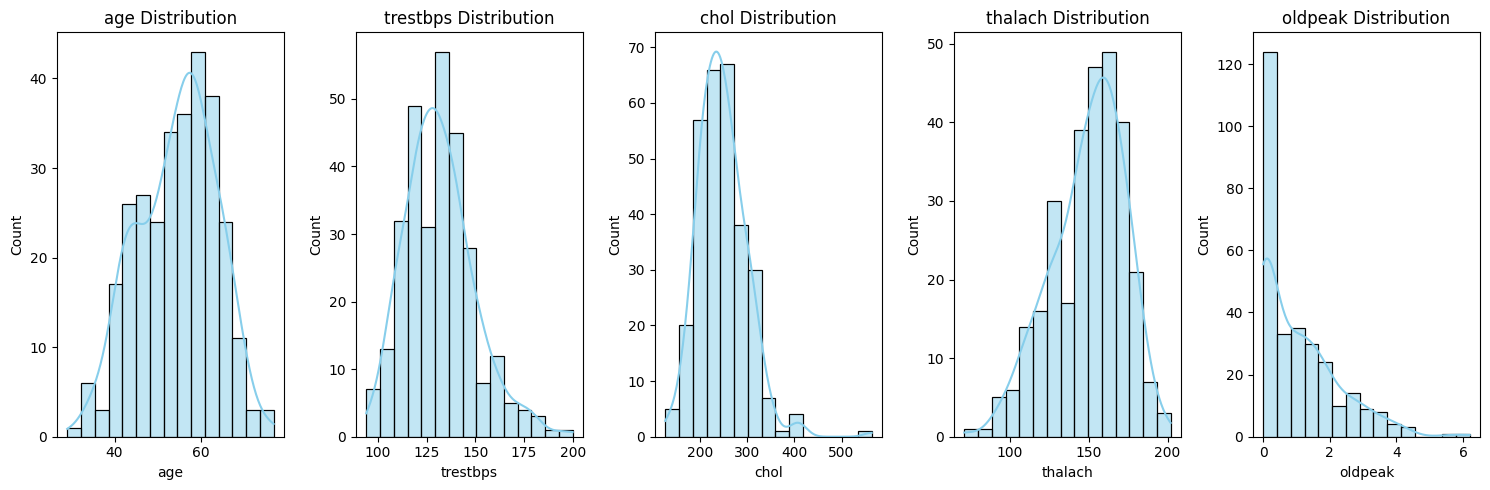

In [10]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data[col], bins=15, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


### **Distribution of Numerical Features**

This set of histograms shows the distribution of key numerical features in the dataset — age, trestbps (resting blood pressure), chol (cholesterol), thalach (maximum heart rate), and oldpeak (ST depression).

**Age:** Most patients are between 45 and 60 years old, showing middle-aged people are more common in the dataset.

**Resting Blood Pressure (trestbps):** Mostly centered around 120–140 mmHg, which is close to the normal range.

**Cholesterol (chol):** Skewed slightly to the right — a few people have very high cholesterol levels.

**Maximum Heart Rate (thalach):** Mostly between 130–170 bpm, showing a normal healthy range.

**Oldpeak:** Highly right-skewed, meaning most patients have low ST depression, but a few have significantly high values.


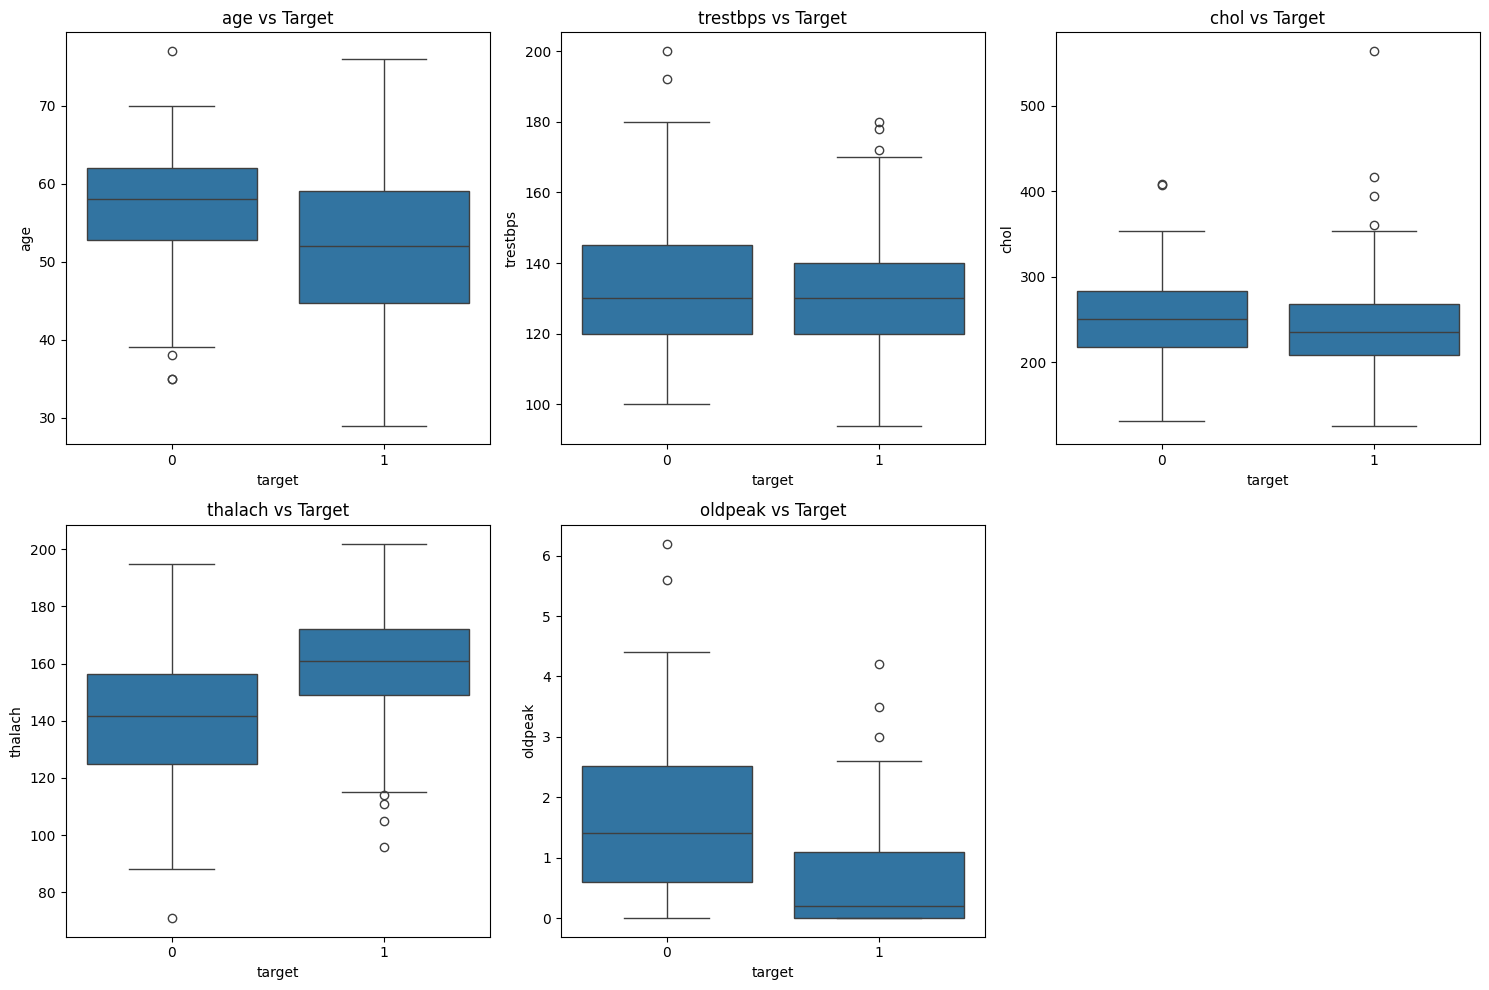

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()


### **Boxplot Analysis of Key Features vs Target**

The boxplots above show the relationship between some important health indicators and the target variable (presence or absence of heart disease).

- **Age vs Target:**  
  People with heart disease (target = 1) tend to be slightly younger on average compared to those without heart disease (target = 0).  

- **Resting Blood Pressure (trestbps) vs Target:**  
  Both groups have a similar distribution of resting blood pressure, though patients without heart disease show slightly higher variation.

- **Cholesterol (chol) vs Target:**  
  Cholesterol levels are quite spread out for both groups, but the median cholesterol is almost similar for both. Some extreme outliers are visible,   indicating very high cholesterol values in a few cases.

- **Maximum Heart Rate (thalach) vs Target:**  
  People with heart disease (target = 1) generally have **higher maximum heart rates**, suggesting that healthier hearts tend to reach a higher rate during exercise or stress tests.

- **Oldpeak vs Target:**  
  Oldpeak (ST depression induced by exercise) is notably higher for patients without heart disease. A lower oldpeak value seems to be associated with having heart disease.

### Summary:
Overall, heart disease patients tend to be slightly younger, have lower oldpeak values, and higher maximum heart rates, while other parameters like cholesterol and resting blood pressure do not show a very clear difference.


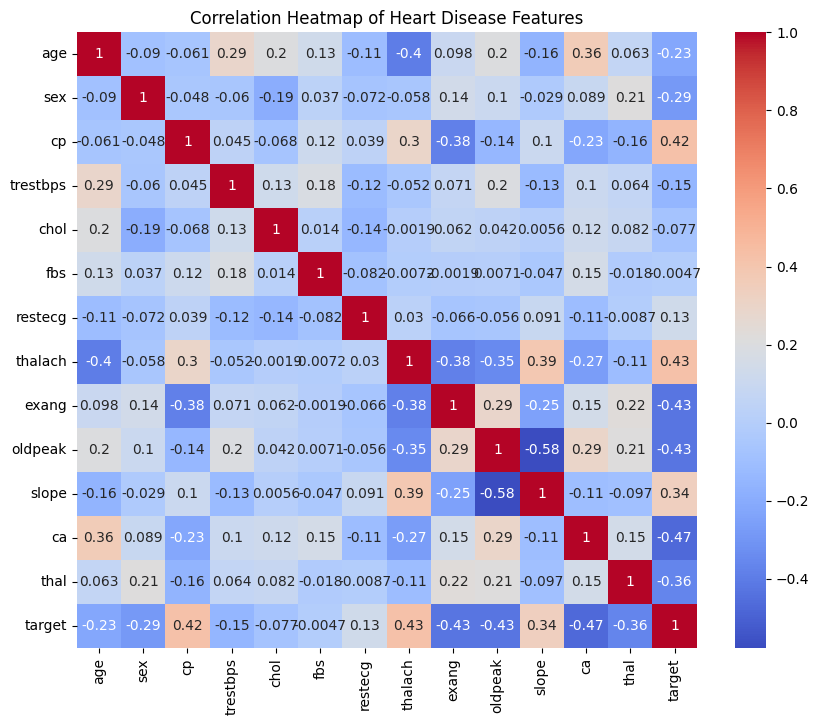

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

## **Correlation Heatmap Analysis**

The heatmap shows how different features relate to heart disease.

- **cp (chest pain type)** and **thalach (max heart rate)** are **positively correlated** with heart disease.  
- **oldpeak**, **exang (exercise angina)**, and **sex** are **negatively correlated**, meaning higher values reduce heart disease chances.  
- **chol** and **trestbps** show **weak correlation**, so they don’t impact much.  

### Summary:
Chest pain type, heart rate, oldpeak, and exercise angina are the **most important features** linked with heart disease.




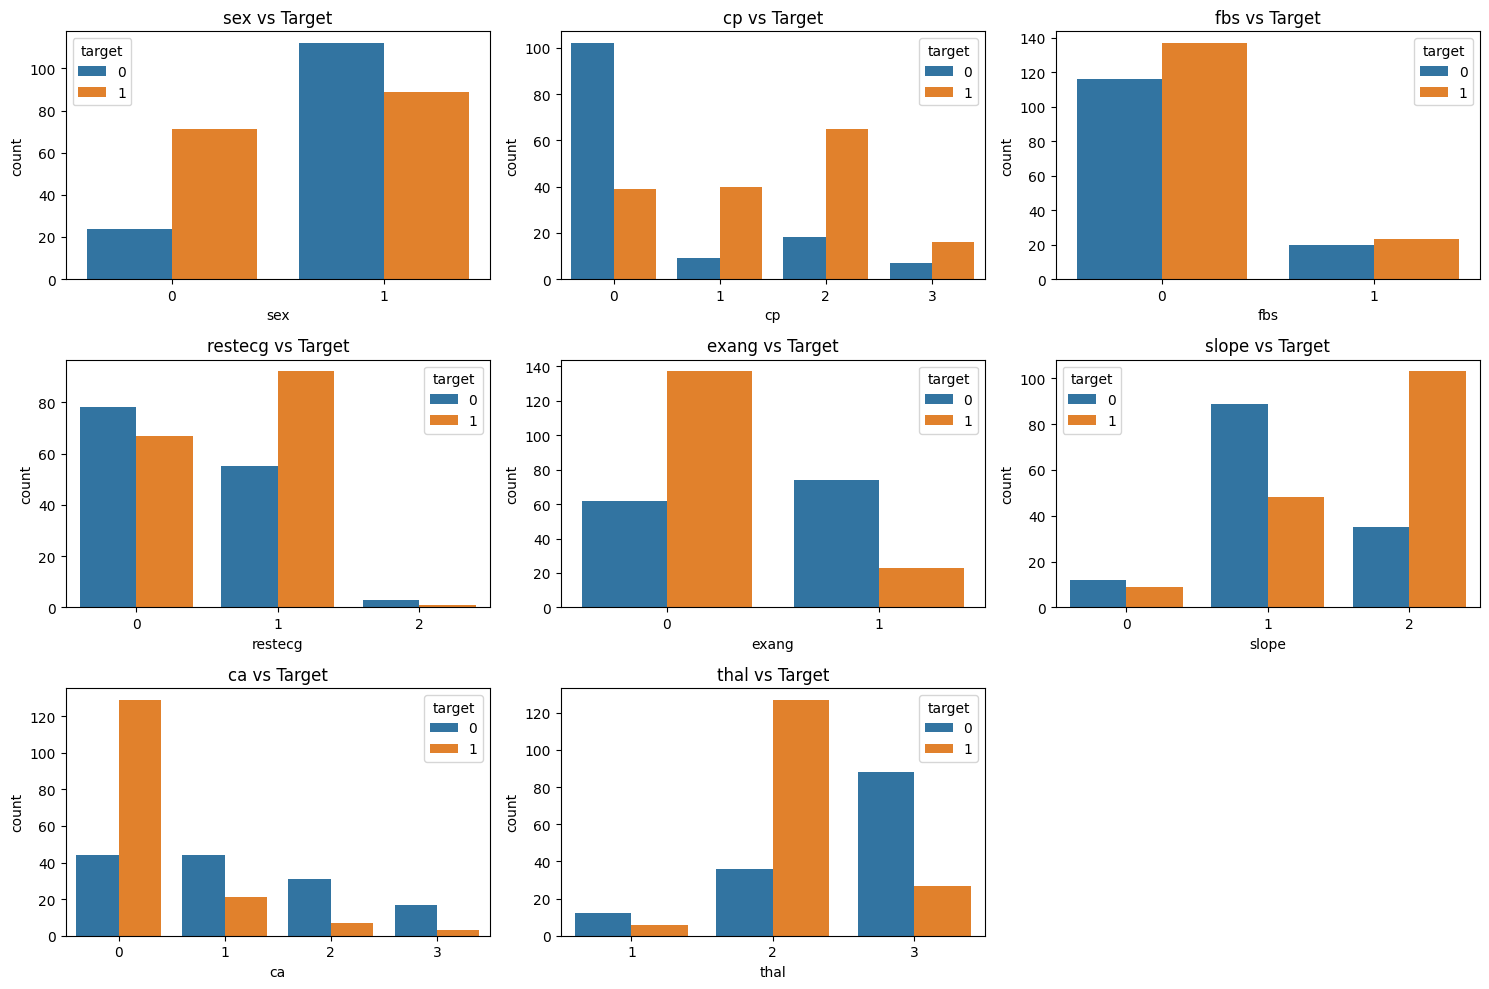

In [13]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='target', data=data)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()



## **Categorical Features vs Target**

These bar plots show how different categorical features relate to heart disease.

- **Sex:** More females (sex = 0) have heart disease compared to males (sex = 1).  
- **Chest Pain Type (cp):** Higher chest pain types (2 and 3) are linked with more heart disease cases.  
- **Fasting Blood Sugar (fbs):** Has little difference between both groups.  
- **Resting ECG (restecg):** Slightly more heart disease cases when restecg = 1.  
- **Exercise Angina (exang):** People **without** exercise-induced angina (exang = 0) have more heart disease.  
- **Slope:** A slope value of 2 is more common in patients with heart disease.  
- **Ca:** Fewer major vessels (ca = 0) are associated with heart disease.  
- **Thal:** Thal value of 2 is most common among heart disease patients.

### Summary:
Chest pain type, slope, and exercise angina show the clearest differences between healthy and heart disease groups.


### **Printing Features Having Highest To Lowest Correlation With Target**



In [14]:
corr_target = data.corr()['target'].sort_values(ascending=False)
print(corr_target)



target      1.000000
thalach     0.426655
cp          0.423425
slope       0.337825
restecg     0.131716
fbs        -0.004680
chol       -0.076541
trestbps   -0.148922
age        -0.225453
sex        -0.285322
thal       -0.364399
exang      -0.425085
oldpeak    -0.428804
ca         -0.467158
Name: target, dtype: float64


### **Splitting Features and Target**

In [15]:
x=data.drop(columns=["target"])
y=data["target"]

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 296, dtype: int64

### **Train, Cross-Validation, and Test Split**




In [18]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.20,random_state=42)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=42)
print("training set shape (input) :",x_train.shape)
print("training set shape (output) :",y_train.shape)
print("cross validation set shape (input) :",x_cv.shape)
print("cross validation set shape (output):",y_cv.shape)
print("testing set shape (input):",x_test.shape)
print("testing set shape (output):",y_test.shape)

training set shape (input) : (236, 13)
training set shape (output) : (236,)
cross validation set shape (input) : (30, 13)
cross validation set shape (output): (30,)
testing set shape (input): (30, 13)
testing set shape (output): (30,)


The dataset was divided into **three parts** to train, validate, and test the model effectively:  
- **80%** of the data was used for training.  
- The remaining **20%** was further split equally into **cross-validation** and **test sets** (10% each).  

This ensures the model is trained properly, fine-tuned using the validation set, and finally tested on unseen data to evaluate its true performance.

### **Feature Scaling using StandardScaler**
We scale all numerical features using **StandardScaler** to normalize data and improve model performance.


In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_cv_scaled=scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test) 

###  **Model Training using Logistic Regression**

In [20]:
model=LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
y_train_pred=model.predict(x_train_scaled)
y_cv_pred=model.predict(x_cv_scaled)

### **CHECKING FOR OVERFITTING AND UNDERFITTING**

In [22]:
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))
print("\nCross-Validation Set Metrics:")
print("Accuracy:", accuracy_score(y_cv, y_cv_pred))
print("F1 Score:", f1_score(y_cv, y_cv_pred))
print("Precision:", precision_score(y_cv, y_cv_pred))
print("Recall:", recall_score(y_cv, y_cv_pred))
print("\nConfusion Matrix (CV):\n", confusion_matrix(y_cv, y_cv_pred))

Training Set Metrics:
Accuracy: 0.8686440677966102
F1 Score: 0.8838951310861424
Precision: 0.8489208633093526
Recall: 0.921875

Confusion Matrix (Train):
 [[ 87  21]
 [ 10 118]]

Cross-Validation Set Metrics:
Accuracy: 0.8
F1 Score: 0.8125
Precision: 0.8125
Recall: 0.8125

Confusion Matrix (CV):
 [[11  3]
 [ 3 13]]


### **Model Performance Analysis**

The model achieved **86.8% accuracy on the training set** and **80% on the cross-validation set**, showing only a small performance gap. This indicates that the model is **not overfitting** and generalizes well to unseen data. The balanced precision and recall values further confirm stable performance.


### **Test Set Prediction**

In [23]:
y_test_pred=model.predict(x_test_scaled)
print("\nTest-Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("\nConfusion Matrix (CV):\n", confusion_matrix(y_test, y_test_pred))


Test-Set Metrics:
Accuracy: 0.9
F1 Score: 0.9032258064516129
Precision: 0.9333333333333333
Recall: 0.875

Confusion Matrix (CV):
 [[13  1]
 [ 2 14]]


### Model Evaluation on Test Set

The model achieved **90% accuracy** on the test data, showing strong generalization performance.  
- **Precision (93%)** indicates it correctly identifies most true positive heart disease cases.  
- **Recall (87%)** shows good sensitivity in detecting actual positive cases.  
- **F1 Score (90%)** balances precision and recall effectively.  



## **ROC Curve**

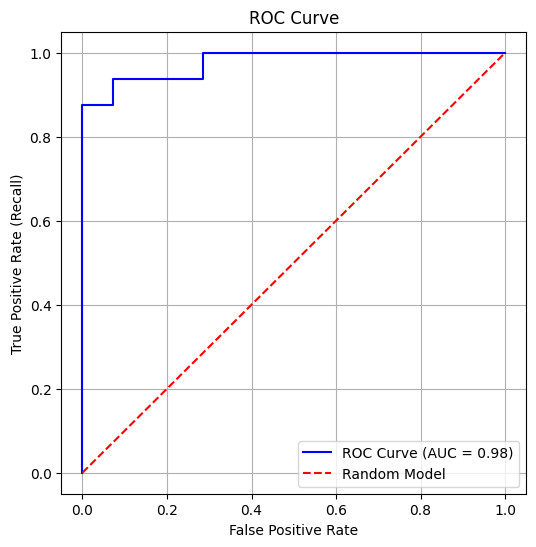

In [24]:
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Model')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### **Saving Scaler Object**

In [25]:
with open("heart_disease_scaler.pkl",'wb') as f1:
    pickle.dump(scaler,f1)

### **Saving Trained Model**

In [26]:
with open("heart_disease_pred_model.pkl",'wb') as f2:
    pickle.dump(model,f2)